In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [5]:
###### 1D VERSION #######
#########################

# fxn(x) is used to define f(x) in the Poisson equation -d^2P/dx^2 = f(x)
def fxn_1D(x):
    return 4.0*np.pi*np.pi*np.sin(2.0*np.pi*x)
    #return np.sin(x)
    #return np.cos(x)

# exact(x) is used to define the analytical solution to the 1D Poisson equation -d^2P/dx^2 = f(x)
def exact_1D(x):
    return np.sin(2.0*np.pi*x)
    #return np.sin(x)
    #return np.cos(x)

    
def evalFD_1D(nPts):
    # left endpoint of solution domain
    leftBdry = 0.0
    
    # right endpoint of solution domain
    rightBdry = 1.0
    #rightBdry = 2.0*np.pi
    
    # num grid point locations in the discretization (comes from the input argument)
    numPts = nPts
    
    # calculate the grid spacing between points (assumed to be uniform)
    dx = (rightBdry-leftBdry)/numPts

    # generate the RHS function: dx^2 * f(x_i)
    # we use (rightBdry - dx) here since the periodic make rightBdry = leftBdry, so we don't need a point there
    x = np.linspace(leftBdry, rightBdry-dx, numPts)
    rhs = fxn_1D(x)*dx*dx
    
    # generate the LHS matrix for a periodic solution to the 1D Poisson equation, this is a standard structure
    # that is independent of f(x).  Note that the 1/dx^2 has been accounted for in the RHS above
    lhs = np.zeros([numPts,numPts])
    for i in range(0,numPts):
        lhs[i][i] = 2.0
        lhs[i][(i+1) % numPts] = -1.0
        lhs[i][(i-1) % numPts] = -1.0

    # here we are applying the free BC to the matrix and RHS.  For example, if we assume that P(leftBdry) = 0, then
    # we want to 0 out the first row and column (the ones associated with the equation for P(leftBdry)) and put a 
    # 1 in the diagonal entry.  Then we go to the RHS for that entry and set it to 0.  It is always assumed that
    # index 0 corresponds to the left boundary in the domain
    lhs[0][:] = 0.0
    for i in range(1,numPts):
        lhs[i][0] = 0.0
        
    lhs[0][0] = 1.0
    rhs[0] = 0.0
    
    # calculate the inverse of the lhs in order to directly solve the matrix equation
    lhsInv = np.linalg.inv(lhs)

    # the solution to the matrix equation (LHS . P = RHS) is found by (P = LHS^-1 . RHS)
    Psoln = lhsInv.dot(rhs)
    
    # determine the exact solution
    exactSoln = exact_1D(x)
    
    # print statements used for diagnostics and debugging
    #print lhs.dot(lhsInv)
    #print Psoln, exact
    
    # plot the solution versus the exact solution
    # FIXME: this ends up making two plots
    plt.plot(x,exactSoln)
    plt.plot(x,Psoln)
    plt.show()
    
    # return the solution and the number of discretization points for plotting
    return numPts, np.sum(np.abs(Psoln - exactSoln))/numPts

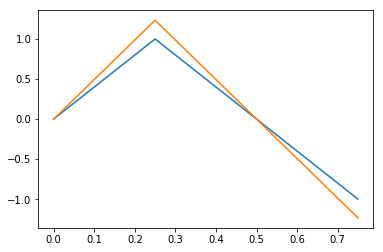

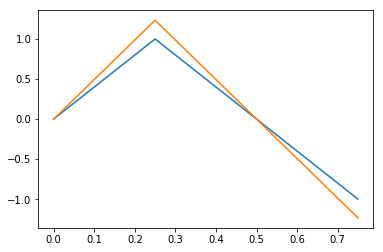

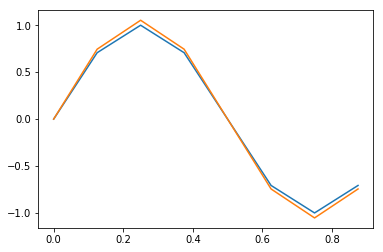

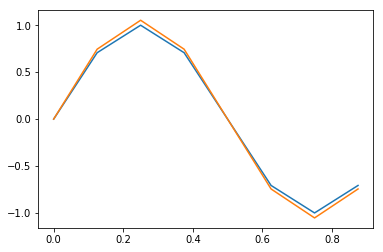

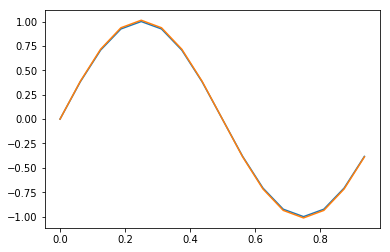

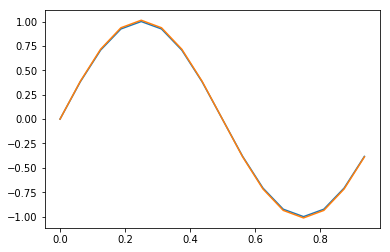

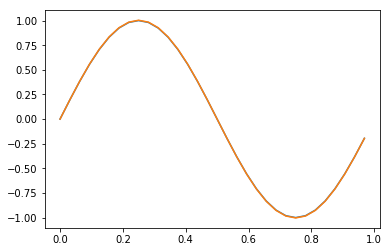

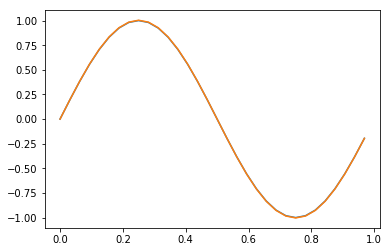

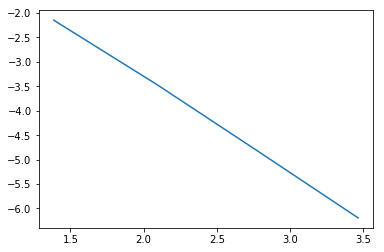

In [6]:
# Empty matrix to put solutions in
pltter = []

# Loop from 4 to 32 by powers of 2
for i in range(2,6):
    # calculate power of 2 for number of gridpoints to pass into FD solver
    j = 2**i
    # calculate solution using FD solver and add to printing array to assess solution convergence
    pltter.append([evalFD_1D(j)[0],evalFD_1D(j)[1]])

# need to transpose so that it can be plotted properly
pltter = np.transpose(pltter)

# plot solution in log-log space, should be linear for the current FD solver
plt.plot(np.log(pltter[0][:]),np.log(pltter[1][:]))

In [7]:
###### 2D VERSION #######
#########################

# fxn(x,y) is used to define f(x,y) in the Poisson equation -d^2P/dx^2 - -d^2P/dy^2 = f(x,y)
def fxn_2D(x,y):
    return 2.0*np.sin(x)*np.sin(y)

# exact(x,y) is used to define the analytical solution to the 2D Poisson equation -d^2P/dx^2 - -d^2P/dy^2 = f(x,y)
def exact_2D(x,y):
    return np.sin(x)*np.sin(y)


def evalFD_2D(nPts):
    # left endpoints of solution domain
    leftBdry = np.array([0.0,0.0])
    
    # right endpoints of solution domain
    rightBdry = np.array([2.0*np.pi, 2.0*np.pi])
    
    # num total grid point locations (square of number in each direction which comes from the input argument)
    totalPts = nPts*nPts
    
    # calculate the grid spacing between points (assumed to be equal and uniform in both directions)
    # note the use of nPts here, the number of grid points in each direction
    dx = (rightBdry[0]-leftBdry[0])/nPts

    # generate the RHS function: dx^2 * f(x_i,y_i)
    # we use (rightBdry - dx) here since the periodic make rightBdry = leftBdry, so we don't need a point there
    # again, note the use of nPts here, the number of grid points in each direction
    x = np.linspace(leftBdry[0], rightBdry[0]-dx, nPts)
    y = np.linspace(leftBdry[1], rightBdry[1]-dx, nPts)
    
    rhs = np.zeros([totalPts])
    exactSoln = np.zeros([totalPts])
    # here we loop over each grid point and calculate the RHS, we assume we go through x's first and then y's
    for i in range(0, nPts):
        for j in range(0,nPts):
            # use j for xx so that we loop over each row (i.e. at a fixed y-coord) first
            xx = j*dx
            yy = i*dx
            
            # calculate the 1D RHS index
            rhsIndex = i * nPts + j
            rhs[rhsIndex] = fxn_2D(xx,yy)*dx*dx
            
            # determine the exact solution
            # Note that this has been moved up here in 2D, to take advantage of the loop
            exactSoln[rhsIndex] = exact_2D(xx,yy)
    
    
    # generate the LHS matrix for a periodic solution to the 2D Poisson equation, this is a standard structure
    # that is independent of f(x,y).  Note that the 1/dx^2 has been accounted for in the RHS above
    lhs = np.zeros([totalPts,totalPts])
    
    # note that we loop over totalPts here, just apply the correct structure to each row
    for i in range(0, totalPts):
        lhs[i][i] = 4.0
        lhs[i][(i/nPts)*nPts + (i+1) % nPts] = -1.0
        lhs[i][(i/nPts)*nPts + (i-1) % nPts] = -1.0
        lhs[i][(i+nPts) % totalPts] = -1.0
        lhs[i][(i-nPts) % totalPts] = -1.0

    # here we are applying the free BC to the matrix and RHS.  For example, if we assume that P(leftBdry) = 0, then
    # we want to 0 out the first row and column (the ones associated with the equation for P(leftBdry)) and put a 
    # 1 in the diagonal entry.  Then we go to the RHS for that entry and set it to 0.  It is always assumed that
    # index 0 corresponds to the left boundary in the domain
    lhs[0][:] = 0.0
    for i in range(1,totalPts):
        lhs[i][0] = 0.0
        
    lhs[0][0] = 1.0
    rhs[0] = 0.0
    
    # calculate the inverse of the lhs in order to directly solve the matrix equation
    #lhsInv = np.linalg.inv(lhs)

    # the solution to the matrix equation (LHS . P = RHS) is found by (P = LHS^-1 . RHS)
    #Psoln = lhsInv.dot(rhs)
    
    # PRAO: implement the CG method in here
    import scipy
    import scipy.sparse
    import scipy.sparse.linalg
    
    Psoln = scipy.sparse.linalg.cg(lhs,rhs)[0]
    print Psoln

    # print statements used for diagnostics and debugging
    #print lhs.dot(lhsInv)
    
    # plot the solution versus the exact solution
    # FIXME: Can't get the plotting to fully work in 2D... The exact solution seems to plot okay, but I am having
    #        trouble plotting the Psoln because it is a 1D array and the surface plotter wants it to be a 2D array
    #        I'm sure this just needs to be resized, but it's not working for me... so I'm giving up :)
    X,Y = np.meshgrid(x, y)
    Z = exact_2D(X,Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
    # FIXME: Here is where it is trying to plot Psoln
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    # FIXME: Convert Psoln, a 1D array to a 2D array of dimension nPts by nPts
    #Z = Psoln.resize((nPts,nPts))
    #surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    #plt.show()
    
    # return the solution and the number of discretization points for plotting
    #print nPts
    #print Psoln
    #print exactSoln
    #print totalPts
    return nPts, np.sum(np.abs(Psoln - exactSoln))/totalPts

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.23370055e+00  1.51084743e-16 -1.23370055e+00
  0.00000000e+00  1.51084743e-16  1.85025447e-32 -1.51084743e-16
  0.00000000e+00 -1.23370055e+00 -1.51084743e-16  1.23370055e+00]


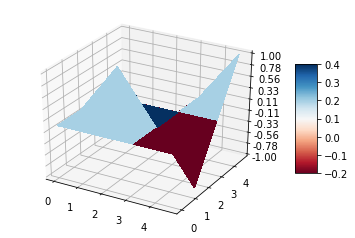

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.23370055e+00  1.51084743e-16 -1.23370055e+00
  0.00000000e+00  1.51084743e-16  1.85025447e-32 -1.51084743e-16
  0.00000000e+00 -1.23370055e+00 -1.51084743e-16  1.23370055e+00]


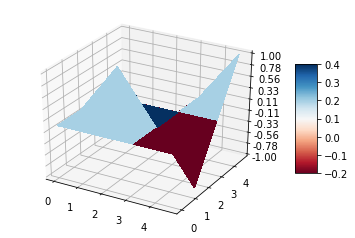

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.26514644e-01  7.44604150e-01  5.26514644e-01
  9.11877089e-17 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
  0.00000000e+00  7.44604150e-01  1.05302929e+00  7.44604150e-01
  1.28958895e-16 -7.44604150e-01 -1.05302929e+00 -7.44604150e-01
  0.00000000e+00  5.26514644e-01  7.44604150e-01  5.26514644e-01
  9.11877089e-17 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
  0.00000000e+00  9.11877089e-17  1.28958895e-16  9.11877089e-17
  1.57929098e-32 -9.11877089e-17 -1.28958895e-16 -9.11877089e-17
  0.00000000e+00 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
 -9.11877089e-17  5.26514644e-01  7.44604150e-01  5.26514644e-01
  0.00000000e+00 -7.44604150e-01 -1.05302929e+00 -7.44604150e-01
 -1.28958895e-16  7.44604150e-01  1.05302929e+00  7.44604150e-01
  0.00000000e+00 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
 -9.11877089e-17  5.26514

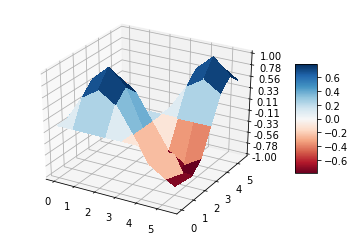

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.26514644e-01  7.44604150e-01  5.26514644e-01
  9.11877089e-17 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
  0.00000000e+00  7.44604150e-01  1.05302929e+00  7.44604150e-01
  1.28958895e-16 -7.44604150e-01 -1.05302929e+00 -7.44604150e-01
  0.00000000e+00  5.26514644e-01  7.44604150e-01  5.26514644e-01
  9.11877089e-17 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
  0.00000000e+00  9.11877089e-17  1.28958895e-16  9.11877089e-17
  1.57929098e-32 -9.11877089e-17 -1.28958895e-16 -9.11877089e-17
  0.00000000e+00 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
 -9.11877089e-17  5.26514644e-01  7.44604150e-01  5.26514644e-01
  0.00000000e+00 -7.44604150e-01 -1.05302929e+00 -7.44604150e-01
 -1.28958895e-16  7.44604150e-01  1.05302929e+00  7.44604150e-01
  0.00000000e+00 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
 -9.11877089e-17  5.26514

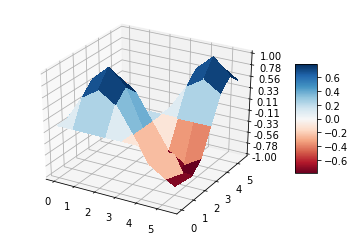

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.48343202e-01  2.74102497e-01  3.58132171e-01
  3.87639469e-01  3.58132171e-01  2.74102497e-01  1.48343202e-01
  4.74721434e-17 -1.48343202e-01 -2.74102497e-01 -3.58132171e-01
 -3.87639469e-01 -3.58132171e-01 -2.74102497e-01 -1.48343202e-01
  0.00000000e+00  2.74102497e-01  5.06475373e-01  6.61741965e-01
  7.16264342e-01  6.61741965e-01  5.06475373e-01  2.74102497e-01
  8.77170834e-17 -2.74102497e-01 -5.06475373e-01 -6.61741965e-01
 -7.16264342e-01 -6.61741965e-01 -5.06475373e-01 -2.74102497e-01
  0.00000000e+00  3.58132171e-01  6.61741965e-01  8.64607544e-01
  9.35844462e-01  8.64607544e-01  6.61741965e-01  3.58132171e-01
  1.14607893e-16 -3.58132171e-01 -6.61741965e-01 -8.64607544e-01
 -9.35844462e-01 -8.64607

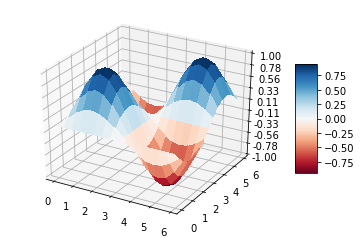

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.48343202e-01  2.74102497e-01  3.58132171e-01
  3.87639469e-01  3.58132171e-01  2.74102497e-01  1.48343202e-01
  4.74721434e-17 -1.48343202e-01 -2.74102497e-01 -3.58132171e-01
 -3.87639469e-01 -3.58132171e-01 -2.74102497e-01 -1.48343202e-01
  0.00000000e+00  2.74102497e-01  5.06475373e-01  6.61741965e-01
  7.16264342e-01  6.61741965e-01  5.06475373e-01  2.74102497e-01
  8.77170834e-17 -2.74102497e-01 -5.06475373e-01 -6.61741965e-01
 -7.16264342e-01 -6.61741965e-01 -5.06475373e-01 -2.74102497e-01
  0.00000000e+00  3.58132171e-01  6.61741965e-01  8.64607544e-01
  9.35844462e-01  8.64607544e-01  6.61741965e-01  3.58132171e-01
  1.14607893e-16 -3.58132171e-01 -6.61741965e-01 -8.64607544e-01
 -9.35844462e-01 -8.64607

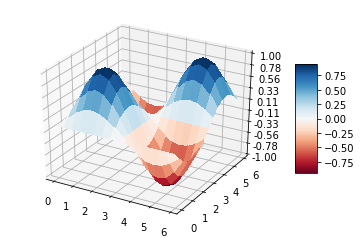

[0.         0.         0.         ... 0.10873527 0.07489815 0.03818275]


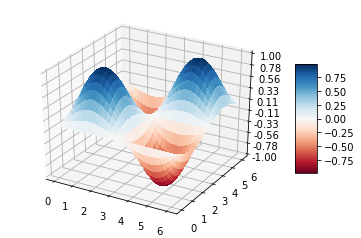

[0.         0.         0.         ... 0.10873527 0.07489815 0.03818275]


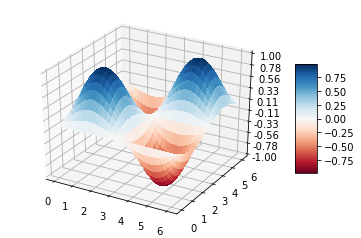

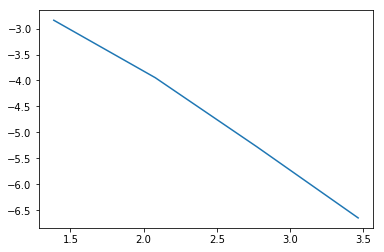

In [8]:
# Empty matrix to put solutions in
pltter = []

# Loop from 4 to 32 grid points in each direction by powers of 2
for i in range(2,6):
    # calculate power of 2 for number of gridpoints to pass into FD solver
    j = 2**i
    # calculate solution using FD solver and add to printing array to assess solution convergence
    pltter.append([evalFD_2D(j)[0],evalFD_2D(j)[1]])

# need to transpose so that it can be plotted properly
pltter = np.transpose(pltter)

# plot solution in log-log space, should be linear for the current FD solver
plt.plot(np.log(pltter[0][:]),np.log(pltter[1][:]))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.26514644e-01  7.44604150e-01  5.26514644e-01
  9.11877089e-17 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
  0.00000000e+00  7.44604150e-01  1.05302929e+00  7.44604150e-01
  1.28958895e-16 -7.44604150e-01 -1.05302929e+00 -7.44604150e-01
  0.00000000e+00  5.26514644e-01  7.44604150e-01  5.26514644e-01
  9.11877089e-17 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
  0.00000000e+00  9.11877089e-17  1.28958895e-16  9.11877089e-17
  1.57929098e-32 -9.11877089e-17 -1.28958895e-16 -9.11877089e-17
  0.00000000e+00 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
 -9.11877089e-17  5.26514644e-01  7.44604150e-01  5.26514644e-01
  0.00000000e+00 -7.44604150e-01 -1.05302929e+00 -7.44604150e-01
 -1.28958895e-16  7.44604150e-01  1.05302929e+00  7.44604150e-01
  0.00000000e+00 -5.26514644e-01 -7.44604150e-01 -5.26514644e-01
 -9.11877089e-17  5.26514

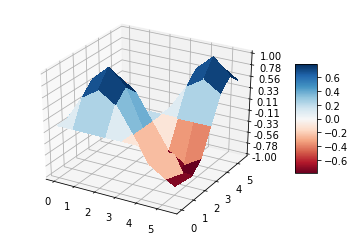

(8, 0.01931733362101523)

In [9]:
evalFD_2D(8)